### Load tensorflow

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


### Collect Data

In [2]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.mnist.load_data()

In [3]:
trainX.shape    #total 60000 images each with size 28x28 pixels

(60000, 28, 28)

In [4]:
np.set_printoptions(linewidth=200)
trainX[0]        #displaying pixels

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

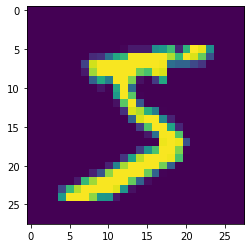

In [5]:
plt.imshow(trainX[0])    #displaying image

In [6]:
trainY[0]       #the first image represents the digit 5

5

In [7]:
trainY[567]

7

In [8]:
testY[8901]

6

In [9]:
testX.shape    #total 10000 images each with size 28x28 pixels

(10000, 28, 28)

### Convert Output label to multiple values
- Applying one-hot encoding
- This will help us in locating the digit in an array, as our result will be an array of probabilities and we need to choose the position with highest probability.

In [10]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [11]:
trainY[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Build the Graph

In [12]:
tf.keras.backend.clear_session()  #remove the default graph, if any

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
# Use reshape() or you can use flatten() also. 
# This is because, NN cannot handle 2-D data. It always needs a 1D vector.

model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
# BatchNormalization takes a batch of data and performs z-score normalization by taking mean and std of that batch of data
model.add(tf.keras.layers.BatchNormalization())

# Alternatively, the following code does min-max normalization
#trainX, testX= trainX/255.0, testX/255.0

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='sigmoid'))
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

## Build the Graph...

## Compile the Graph...

In [13]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#model.compile(optimizer='adom', loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3

**NOTE** : 
- The non-trainable parameters are 1568 when batch normalization is used. 
- Because these are the mean and standard deviations of 784 inputs, and are actually calculated from the input values, but not to be learnt by the model.
- By adding 1568 parameters in the second layer with equal number of bias terms, the total parameters in the second layer will become 3136.
- The second layer is ***NOT A DENSE*** layer. So, the computational graph must be drawn carefully.


## Train the model
- Batch_size is given as 32. 
- So, total number of batches =  60000/32 = 1875. 
- In one iteration, the graph will run 1875 times. 
- Total of 30 epochs, so the graph will run 1875*30 = 56250 times

In [15]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2961 - accuracy: 0.1406 - val_loss: 2.2833 - val_accuracy: 0.1135
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1671 - accuracy: 0.2583 - val_loss: 1.9135 - val_accuracy: 0.3924
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4999 - accuracy: 0.5398 - val_loss: 0.9948 - val_accuracy: 0.7076
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8525 - accuracy: 0.7415 - val_loss: 0.6810 - val_accuracy: 0.7998
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6582 - accuracy: 0.8054 - val_loss: 0.5300 - val_accuracy: 0.8584
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5139 - accuracy: 0.8578 - val_loss: 0.4160 - val_accuracy: 0.8871
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4225 - accuracy: 0.8809 - val_loss: 0.3576 - val_accuracy:

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [16]:
test_loss, test_acc = model.evaluate(testX,  testY, verbose=2)

313/313 - 1s - loss: 0.1413 - accuracy: 0.9665


### Make predictions

With the model trained, you can use it to make predictions about some images.


In [17]:
predictions = model.predict(testX)

In [18]:
predictions[0]

array([4.1033598e-04, 3.6522263e-09, 1.2938610e-05, 1.9828014e-03, 1.0112936e-06, 1.8903176e-05, 9.3876218e-10, 9.9684840e-01, 7.4796773e-08, 7.2546565e-04], dtype=float32)

In [19]:
import numpy as np
np.argmax(predictions[0])

7

In [20]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

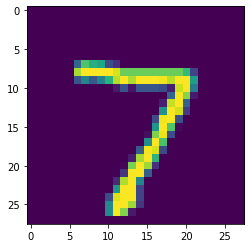

In [21]:
plt.imshow(testX[0])